# Classification : 2 Class

## 1.환경준비

### (1) 라이브러리 로딩

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.backend import clear_session
from keras.optimizers import Adam

* 학습곡선 함수

In [ ]:
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [ ]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.3.csv"
data = pd.read_csv(path)
data.drop(['Age_scale1', 'AgeGroup', 'SibSp','Parch' ], axis = 1, inplace = True)
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


## 2.데이터 준비

Sex, Age, Fare 만 이용하여 Survived 를 예측하는 모델을 만들어 봅시다.

### (1) 데이터 준비

In [ ]:
target = 'Survived'
features = ['Sex', 'Age', 'Fare']
x = data.loc[:, features]
y = data.loc[:, target]

### (2) 가변수화

In [ ]:
x = pd.get_dummies(x, columns = ['Sex'], drop_first = True)
x.head()

,Age,Fare,Sex_male
0,22.0,7.2500,True
1,38.0,71.2833,False
2,26.0,7.9250,False
3,35.0,53.1000,False
4,35.0,8.0500,True


### (3) 데이터분할

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state = 20)

### (4) Scaling

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.딥러닝1: 3개 feature

### (1) 모델설계

In [ ]:
nfeatures = x_train.shape[1]
nfeatures

3

In [ ]:
# 메모리 정리
clear_session()

# Sequential 모델 만들기
model = Sequential( [Input(shape = (nfeatures,)),
                     Dense( 1, activation= 'sigmoid')])

# 모델요약
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

### (2) compile + 학습

In [ ]:
model.compile(optimizer = Adam(learning_rate=0.01), loss = 'binary_crossentropy')

history = model.fit(x_train, y_train,
                    epochs = 50, validation_split=0.2).history

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.9480 - val_loss: 0.8664
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8451 - val_loss: 0.7950
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7859 - val_loss: 0.7477
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7373 - val_loss: 0.7157
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7074 - val_loss: 0.6957
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6975 - val_loss: 0.6805
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6786 - val_loss: 0.6657
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6656 - val_loss: 0.6534
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6392 - val_loss: 0.6410
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6461 - val_loss: 0.6294
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6475 - val_loss: 0.6188
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6220 - val_l

* 학습결과 그래프

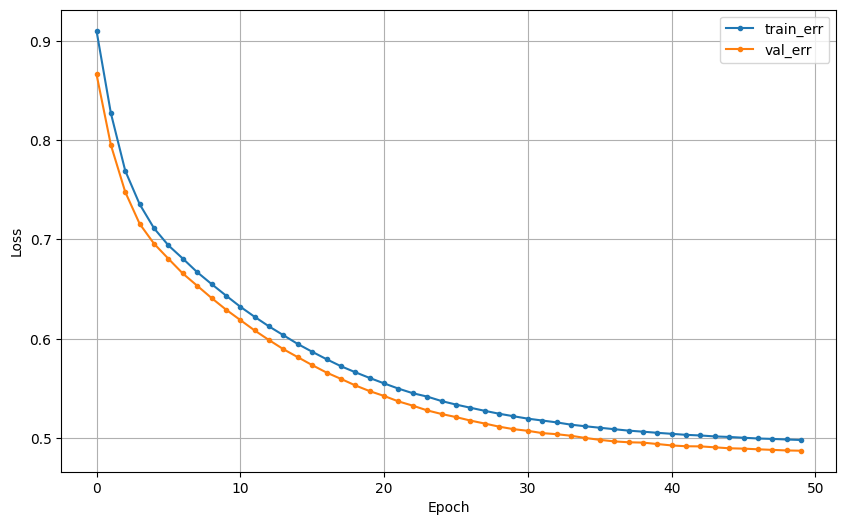

In [ ]:
dl_history_plot(history)

### (3) 예측 및 검증

In [ ]:
pred = model.predict(x_val)
print(pred[:5])

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[[0.65503603]
 [0.17545699]
 [0.22257133]
 [0.1949883 ]
 [0.66214496]]


In [ ]:
# activation이 sigmoid --> 0 ~ 1 사이의 확률값.
# 그러므로 cut-off value(보통 0.5)를 기준으로 잘라서 0과 1로 만들어 준다.
pred = np.where(pred >= .5, 1, 0)
print(pred[:5])

[[1]
 [0]
 [0]
 [0]
 [1]]


In [ ]:
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       170
           1       0.71      0.68      0.69        98

    accuracy                           0.78       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268



## 4.딥러닝2 : 전체 feature
* 이제 전체 데이터를 가지고 모델링을 시도해 보겠습니다.


### (1) 데이터 전처리

* 데이터 준비

In [ ]:
target = 'Survived'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

* 가변수화

In [ ]:
cat_cols = ['Pclass','Sex', 'Embarked']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

* 데이터분할

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state = 20)

* 스케일링

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [ ]:
n = x_train.shape[1]
n

8

In [ ]:
# 메모리 정리
clear_session()

# Sequential 모델
model = Sequential( [Input(shape = (nfeatures,)),
                     Dense( 1, activation = 'sigmoid')])

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


* compile + 학습

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.01), loss = 'binary_crossentropy')
history = model.fit(x_train, y_train, epochs = 50, validation_split=.2).history

Epoch 1/50
16/16 [==============================] - 1s 13ms/step - loss: 0.4414 - val_loss: 0.4407
Epoch 2/50
16/16 [==============================] - 0s 6ms/step - loss: 0.4409 - val_loss: 0.4397
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.4403 - val_loss: 0.4408
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.4398 - val_loss: 0.4403
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 0.4407 - val_loss: 0.4403
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.4393 - val_loss: 0.4419
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.4395 - val_loss: 0.4411
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 0.4390 - val_loss: 0.4404
Epoch 9/50
16/16 [==============================] - 0s 5ms/step - loss: 0.4390 - val_loss: 0.4411
Epoch 10/50
16/16 [==============================] - 0s 4ms/step - loss: 0.4397 - val_loss: 0.4399
Epoch 11/50
16/16 

* 학습결과 그래프

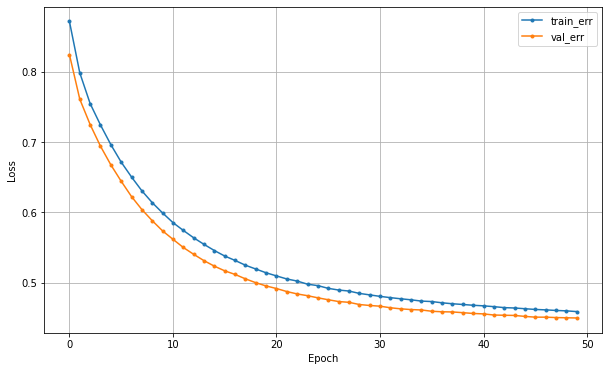

In [ ]:
dl_history_plot(history)

* 예측 및 검증

In [ ]:
pred2 = model.predict(x_val)
pred2 = np.where( pred2 >= .5 , 1, 0)
print(classification_report(y_val, pred2))

9/9 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       170
           1       0.68      0.66      0.67        98

    accuracy                           0.76       268
   macro avg       0.75      0.74      0.74       268
weighted avg       0.76      0.76      0.76       268



----

## 5.딥러닝3 : hidden layer
* 이제 레이어를 추가해 보겠습니다.


### (1) 모델 설계

In [ ]:
n = x_train.shape[1]
n

8

In [ ]:
# 메모리 정리
clear_session()

# Sequential 모델
model3 = Sequential([Input(shape = (n,)),
                     Dense( 4, activation = 'relu'),
                     Dense( 1, activation = 'sigmoid')])

# 모델요약
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


### (2) compile + 학습

In [ ]:
model3.compile( optimizer=Adam(learning_rate= 0.01), loss ='binary_crossentropy')
hist = model3.fit(x_train, y_train, epochs = 50, validation_split=.2 ).history

* 학습결과 그래프

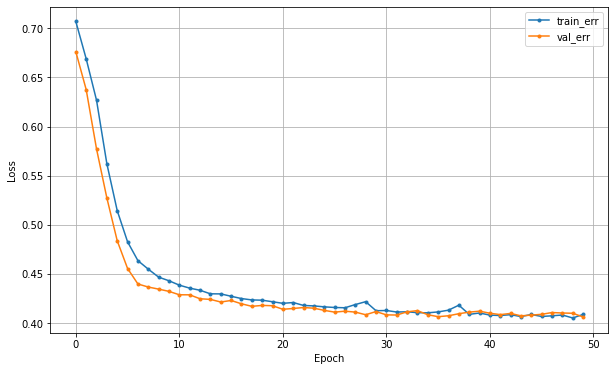

In [ ]:
dl_history_plot(hist)

* 예측 및 검증

In [ ]:
pred3 = model3.predict(x_val)
pred3 = np.where(pred3 >= 0.5, 1, 0)

9/9 [==============================] - 0s 2ms/step


In [ ]:
print(classification_report(y_val, pred3))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       170
           1       0.79      0.57      0.66        98

    accuracy                           0.79       268
   macro avg       0.79      0.74      0.75       268
weighted avg       0.79      0.79      0.78       268



### (3) 실습1

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | 옵션 |
| ---- | ---- | ---- |
| dense (Dense) | (None, 16)  | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 1) | node, activation = 'sigmoid' |     

In [ ]:
m5 = Sequential([Input(shape = (n,)),
                 Dense(16, activation='relu'),
                 Dense(1, activation = 'sigmoid')])
m5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                144       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
m5.compile(optimizer = Adam(learning_rate=.01) , loss = 'binary_crossentropy')
hist = m5.fit(x_train, y_train, epochs = 50 , validation_split= .2).history

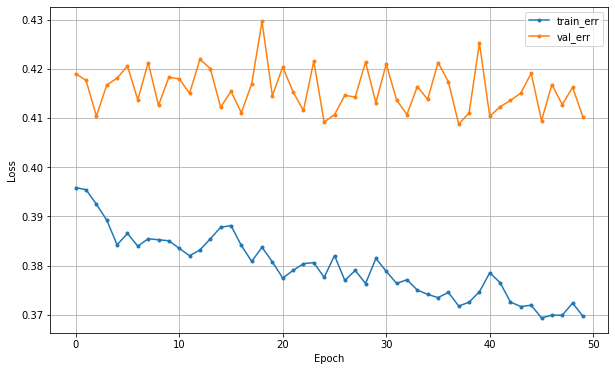

In [ ]:
dl_history_plot(hist)

In [ ]:
p5 = m5.predict(x_val)
p5 = np.where( p5 >= 0.5, 1, 0)

print(classification_report(y_val, p5))

9/9 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       170
           1       0.74      0.63      0.68        98

    accuracy                           0.78       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.78      0.78      0.78       268



### (4) 실습2

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape |  옵션 |
| ---- | ---- | ---- |
| dense (Dense) | (None, 16) |  node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 8) |  node, activation = 'relu'  |
| dense_2 (Dense) | (None, 1) |  node, activation = 'sigmoid'  |

In [ ]:
m6 = Sequential([Input(shape = (n,)),
                 Dense(16, activation='relu'),
                 Dense(8, activation='relu'),
                 Dense(1, activation = 'sigmoid')])
m6.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                144       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
m6.compile(optimizer = Adam(learning_rate=.01) , loss = 'binary_crossentropy')
hist = m6.fit(x_train, y_train, epochs = 50 , validation_split= .2).history

Epoch 1/50
16/16 [==============================] - 2s 43ms/step - loss: 0.5953 - val_loss: 0.5299
Epoch 2/50
16/16 [==============================] - 0s 14ms/step - loss: 0.5191 - val_loss: 0.4800
Epoch 3/50
16/16 [==============================] - 0s 6ms/step - loss: 0.4740 - val_loss: 0.4668
Epoch 4/50
16/16 [==============================] - 0s 6ms/step - loss: 0.4541 - val_loss: 0.4417
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 0.4416 - val_loss: 0.4328
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.4317 - val_loss: 0.4231
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.4257 - val_loss: 0.4119
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 0.4250 - val_loss: 0.4155
Epoch 9/50
16/16 [==============================] - 0s 6ms/step - loss: 0.4153 - val_loss: 0.4064
Epoch 10/50
16/16 [==============================] - 0s 5ms/step - loss: 0.4155 - val_loss: 0.4146
Epoch 11/50
16/16

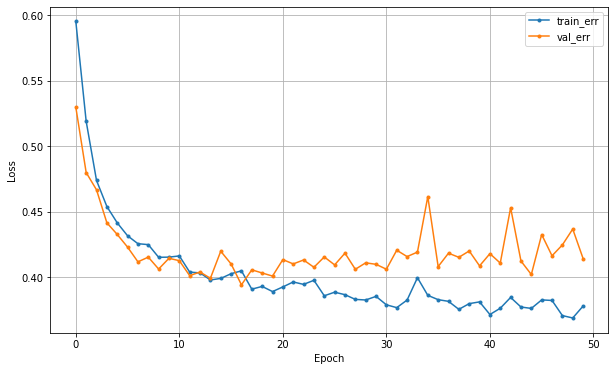

In [ ]:
dl_history_plot(hist)

In [ ]:
p6 = m6.predict(x_val)
p6 = np.where( p6 >= 0.5, 1, 0)

print(classification_report(y_val, p6))

9/9 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.80      0.88      0.83       170
           1       0.74      0.61      0.67        98

    accuracy                           0.78       268
   macro avg       0.77      0.74      0.75       268
weighted avg       0.78      0.78      0.77       268



### (5) 실습3

* 이번에는 여러분이 원하는 대로 설계하고, 학습해 봅시다.
